# Analyzing product cards on marketplaces

The suggested dataset contains information about product cards on marketplaces from July 1 to July 30, 2022. In this project, the data will first be cleaned (removing duplicates, searching for anomalies, dealing with missing values), and then hypotheses will be proposed and statistical tests will be performed on the cleaned data.

## 0. Description of variables

date - date of the observation

region_id - region

local_id - product id (unique on marketplace)

marketplace_id - marketplace

brand_id - brand

is_description - availability of description (1/0)

is_composition - presence of composition (1/0)

images_number - number of images

search_id - search query (there can be several queries for one product)

search_position - position in the output by search query

category_id - category (there can be several categories for one product)

category_position - position in the category

votes - number of reviews

rating - rating

video_availability - video availability (1/0)

availability - availability of the product on the marketplace (1/0)

regular_price - price before discount (if there is no discount, the value is written to the discount_price column, and this column remains null)

discount_price - price with discount 

weight - weight

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
%matplotlib inline

In [2]:
df = pd.read_csv('Тестовая_выгрузка_DA.csv')
df.head(10)

,date,region_id,local_id,marketplace_id,brand_id,is_description,is_composition,images_number,search_id,search_position,category_id,category_position,votes,rating,video_availability,availability,regular_price,discount_price,weight
0,2022-07-01,1,14439,10,5220.0,1,1,1,770.0,81.0,55,9,0.0,0.0,0,1,NaN,16099.0,125.0
1,2022-07-01,1,14439,10,5220.0,1,1,1,770.0,81.0,55,9,0.0,0.0,0,1,NaN,16099.0,125.0
2,2022-07-01,1,22115,10,56489.0,1,1,1,NaN,NaN,59,86,NaN,NaN,0,0,NaN,NaN,300.0
3,2022-07-01,1,22115,10,56489.0,1,1,1,NaN,NaN,59,86,NaN,NaN,0,0,NaN,NaN,300.0
4,2022-07-01,1,109059,1,6060.0,1,1,7,783.0,4.0,55,11,322.0,500.0,1,1,41500.0,34900.0,400.0
5,2022-07-01,1,109059,1,6060.0,1,1,7,764.0,2.0,55,11,322.0,500.0,1,1,41500.0,34900.0,400.0
6,2022-07-01,1,109059,1,6060.0,1,1,7,770.0,3.0,55,11,322.0,500.0,1,1,41500.0,34900.0,400.0
7,2022-07-01,1,109060,1,4360.0,1,1,2,783.0,2.0,55,3,179.0,500.0,0,1,NaN,12000.0,150.0
8,2022-07-01,1,109060,1,4360.0,1,1,2,766.0,1.0,55,3,179.0,500.0,0,1,NaN,12000.0,150.0
9,2022-07-01,1,109060,1,4360.0,1,1,2,770.0,2.0,55,3,179.0,500.0,0,1,NaN,12000.0,150.0


In [3]:
df.shape

(1330665, 19)

In [4]:
df.describe()

,region_id,local_id,marketplace_id,brand_id,is_description,is_composition,images_number,search_id,search_position,category_id,category_position,votes,rating,video_availability,availability,regular_price,discount_price,weight
count,1330665.0,1.330665e+06,1.330665e+06,1.307528e+06,1.330665e+06,1.330665e+06,1.330665e+06,1.171666e+06,1.171666e+06,1.330665e+06,1.330665e+06,409951.000000,383936.000000,1.330665e+06,1.330665e+06,169269.000000,1.098376e+06,1.249949e+06
mean,1.0,2.274509e+06,1.185325e+01,1.512337e+04,6.627130e-01,8.963616e-01,1.399061e+00,7.739882e+02,3.920017e+02,5.852551e+01,2.817172e+02,4.947933,2691.096172,1.603709e-03,7.870313e-01,32345.191358,3.003183e+04,3.741596e+02
std,0.0,5.138686e+05,1.014872e+01,2.002659e+04,4.727839e-01,3.047910e-01,1.121188e+00,8.388151e+00,5.120790e+02,2.464777e+00,6.208290e+02,14.019346,10625.279767,4.001423e-02,4.094059e-01,39993.859064,4.502294e+04,9.736709e+02
min,1.0,1.443900e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.610000e+02,1.000000e+00,5.500000e+01,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,46.000000,1.100000e+01,0.000000e+00
25%,1.0,2.384409e+06,5.000000e+00,5.276000e+03,0.000000e+00,1.000000e+00,1.000000e+00,7.670000e+02,4.600000e+01,5.500000e+01,4.100000e+01,0.000000,0.000000,0.000000e+00,1.000000e+00,12999.000000,1.169900e+04,1.400000e+02
50%,1.0,2.386097e+06,1.000000e+01,5.524000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.740000e+02,1.750000e+02,6.000000e+01,9.000000e+01,0.000000,300.000000,0.000000e+00,1.000000e+00,20045.000000,1.699900e+04,2.000000e+02
75%,1.0,2.393037e+06,1.400000e+01,6.380000e+03,1.000000e+00,1.000000e+00,2.000000e+00,7.810000e+02,5.780000e+02,6.000000e+01,2.360000e+02,4.000000,500.000000,0.000000e+00,1.000000e+00,33000.000000,2.800000e+04,3.000000e+02
max,1.0,2.776543e+06,3.200000e+01,8.460100e+04,1.000000e+00,1.000000e+00,2.100000e+01,7.890000e+02,4.111000e+03,6.100000e+01,8.862000e+03,459.000000,50000.000000,1.000000e+00,1.000000e+00,700000.000000,7.659000e+05,2.280000e+04


## 1. Deleting duplicates

In [5]:
# 1. Due to the fact that the data is time-dependent, deletion will be done by the 'date' column.
# 2. The deletion must also include 'local_id' (product) and 'marketplace_id' (marketplace) codes.
# 3. The 'search_id' and 'category_id' fields should also be included, as there may be 
# multiple searches ('search_id') and categories ('category_id') for one product. 
# (Adding any more columns does not increase/decrease the number of duplicates removed, 
# which means that this set is optimal for the 'subset' argument)

# Убираем дубликаты 
df.drop_duplicates(subset=['date','local_id','search_id', 'marketplace_id', 'category_id'], inplace = True)
df.shape

(981285, 19)

In total, our sample size is 981,285 observations

## 2. Anomalies

In [6]:
# Identifying anomalies associated with typos and data errors
df['is_description'].unique(), df['is_composition'].unique(), df['images_number'].unique(), df['video_availability'].unique()
# As we can see, the columns have clearly labeled integer values

(array([1, 0]),
 array([1, 0]),
 array([ 1,  7,  2,  5,  3,  6,  4, 10,  8,  9,  0, 12, 11, 14, 21]),
 array([0, 1]))

In [7]:
df['search_id'].unique(), df['category_id'].unique()
# The search query and category columns also have no weird values

(array([770.,  nan, 783., 764., 766., 774., 773., 777., 771., 768., 779.,
        765., 778., 789., 788., 782., 781., 767., 761., 780., 786., 784.,
        769., 762., 763., 776., 772., 775., 785., 787.]),
 array([55, 59, 60, 61]))

array([[<AxesSubplot:title={'center':'search_position'}>,
        <AxesSubplot:title={'center':'category_position'}>]], dtype=object)

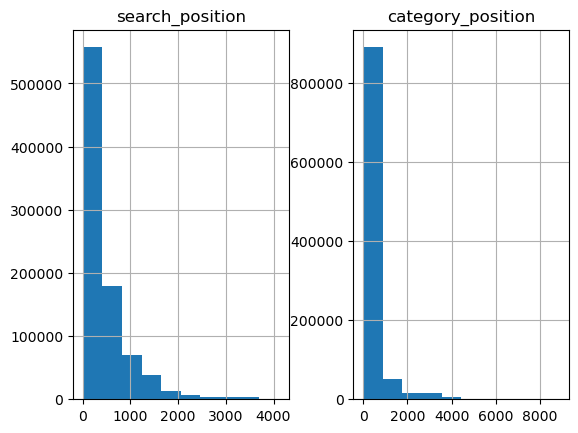

In [8]:
# The category_position column has a wide range of up to 8000.
df[['search_position','category_position']].hist(bins=10)

<AxesSubplot:>

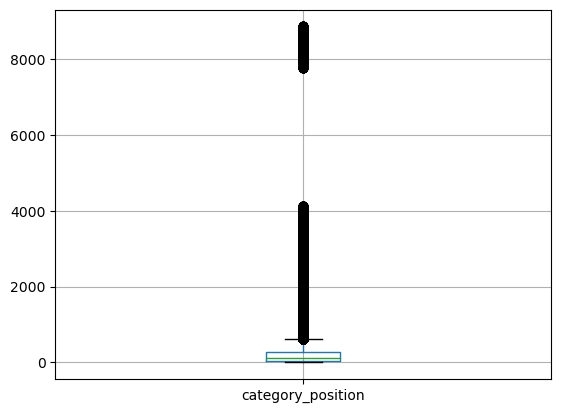

In [9]:
# Let's check for the presence of outliners with a boxplot.
df.boxplot(column=['category_position'])
# You can see that the data is generally centered around the values [0; 4000), but there are some cases that are 
# very different, and are located at positions around (7800; 8500).

In [10]:
# Let's see which category and which marketplace owns the product cards that are ranked so far down in the category
df[df['category_position'] > 6000]['category_id'].unique(), df[df['category_position'] > 6000]['marketplace_id'].unique()

(array([55]), array([32]))

We found out that all these product cards belong to marketplace 32, category 55, which indicates that there are some issues with showing product cards on this marketplace in category 55. 

array([1, 0])

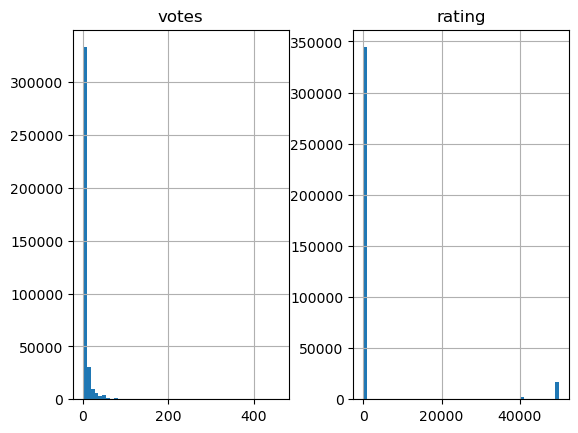

In [11]:
# Let's consider the next set of variables
df[[['votes','rating']].hist(bins=50)
# Checking the values of the availability variable (only values 1 and 0 are expected)
df['availability'].unique()

<AxesSubplot:>

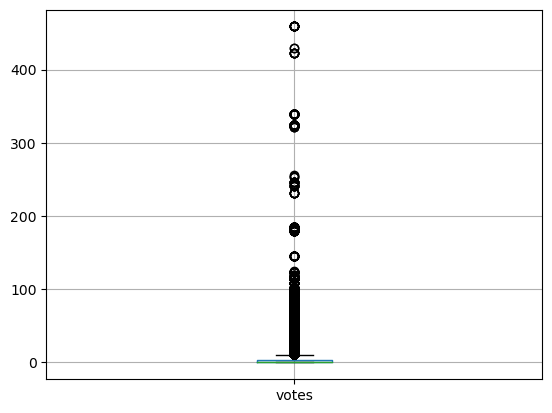

In [12]:
# The votes variable (number of reviews) has quite a large range 
df.boxplot(column=['votes'])

In [13]:
# Starting with votes > 340, products with more votes appear. However is_description = 0 and availability = 0. 
# Also price columns are empty (NaN)

df[df.votes > 340]

,date,region_id,local_id,marketplace_id,brand_id,is_description,is_composition,images_number,search_id,search_position,category_id,category_position,votes,rating,video_availability,availability,regular_price,discount_price,weight
46850,2022-07-01,1,2445358,32,5509.0,0,1,0,770.0,657.0,55,752,459.0,500.0,0,0,NaN,NaN,NaN
96553,2022-07-02,1,2445358,32,5509.0,0,1,0,770.0,2392.0,55,752,459.0,500.0,0,0,NaN,NaN,NaN
145552,2022-07-03,1,2445358,32,5509.0,0,1,0,770.0,3214.0,55,486,459.0,500.0,0,0,NaN,NaN,NaN
195968,2022-07-04,1,2445358,32,5509.0,0,1,0,770.0,2171.0,55,508,459.0,500.0,0,0,NaN,NaN,NaN
245825,2022-07-05,1,2445358,32,5509.0,0,1,0,770.0,2171.0,55,1045,459.0,500.0,0,0,NaN,NaN,NaN
294073,2022-07-06,1,2445358,32,5509.0,0,1,0,NaN,NaN,55,508,459.0,500.0,0,0,NaN,NaN,NaN
342215,2022-07-07,1,2445358,32,5509.0,0,1,0,770.0,2392.0,55,1045,459.0,500.0,0,0,NaN,NaN,NaN
390168,2022-07-08,1,2445358,32,5509.0,0,1,0,770.0,3016.0,55,1045,459.0,500.0,0,0,NaN,NaN,NaN
435014,2022-07-09,1,2445358,32,5509.0,0,1,0,770.0,3214.0,55,752,459.0,500.0,0,0,NaN,NaN,NaN
483374,2022-07-10,1,2445358,32,5509.0,0,1,0,NaN,NaN,55,486,459.0,500.0,0,0,NaN,NaN,NaN


In [14]:
df[df.votes > 340]['marketplace_id'].unique(), df[df.votes > 340]['category_id'].unique()

(array([32]), array([55]))

These “empty” product cards again belong to Marketplace 32, category 55, which again indicates a problem with product cards. Despite a large number of reviews, the product and its price are not available. 

<AxesSubplot:>

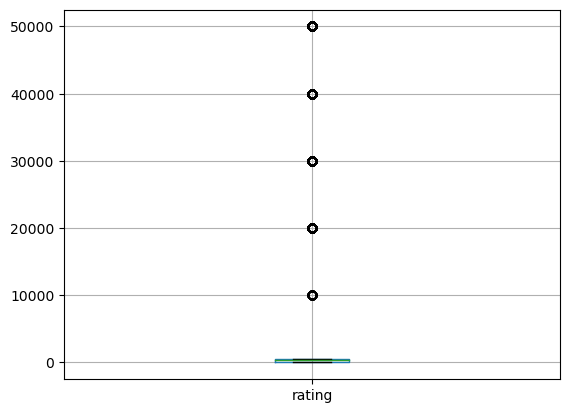

In [15]:
# Let's go to the rating variable and find the outliers
df.boxplot(column=['rating'])

In [16]:
# As we can see, this is due to erroneously adding zeros to the values. The marketplaces typically have a product rating from 1 to 5
df[df.rating >= 10000].head(10)

,date,region_id,local_id,marketplace_id,brand_id,is_description,is_composition,images_number,search_id,search_position,category_id,category_position,votes,rating,video_availability,availability,regular_price,discount_price,weight
646421,2022-07-14,1,2390014,32,5510.0,1,1,1,762.0,53.0,61,16,24.0,50000.0,0,1,NaN,10400.0,150.0
646422,2022-07-14,1,2390014,32,5510.0,1,1,1,763.0,49.0,61,16,24.0,50000.0,0,1,NaN,10400.0,150.0
646423,2022-07-14,1,2390014,32,5510.0,1,1,1,769.0,94.0,61,16,24.0,50000.0,0,1,NaN,10400.0,150.0
646427,2022-07-14,1,2390016,32,4426.0,0,0,2,762.0,167.0,61,18,18.0,50000.0,0,1,NaN,12100.0,150.0
646428,2022-07-14,1,2390016,32,4426.0,0,0,2,763.0,163.0,61,18,18.0,50000.0,0,1,NaN,12100.0,150.0
646429,2022-07-14,1,2390016,32,4426.0,0,0,2,769.0,149.0,61,18,18.0,50000.0,0,1,NaN,12100.0,150.0
646430,2022-07-14,1,2390017,32,5546.0,0,0,2,762.0,264.0,61,25,31.0,50000.0,0,1,NaN,4600.0,90.0
646431,2022-07-14,1,2390017,32,5546.0,0,0,2,769.0,304.0,61,25,31.0,50000.0,0,1,NaN,4600.0,90.0
646432,2022-07-14,1,2390017,32,5546.0,0,0,2,763.0,264.0,61,25,31.0,50000.0,0,1,NaN,4600.0,90.0
646433,2022-07-14,1,2390018,32,5510.0,1,1,1,762.0,192.0,61,26,35.0,50000.0,0,1,NaN,6700.0,100.0


In [17]:
#Dividing by 100 to convert the values to the same format
df.loc[df.rating >= 10000, 'rating'] = df.rating/100
#And converting all values to a 5-point scale
df.loc[:, 'rating'] = df.loc[:, 'rating'] / 100
# Getting values from 0 to 5
df.rating.unique()

array([ 0., nan,  5.,  4.,  3.,  2.,  1.])

## 3. Detecting missing values

In [18]:
# Let's see which columns have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981285 entries, 0 to 1330664
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                981285 non-null  object 
 1   region_id           981285 non-null  int64  
 2   local_id            981285 non-null  int64  
 3   marketplace_id      981285 non-null  int64  
 4   brand_id            958934 non-null  float64
 5   is_description      981285 non-null  int64  
 6   is_composition      981285 non-null  int64  
 7   images_number       981285 non-null  int64  
 8   search_id           876929 non-null  float64
 9   search_position     876929 non-null  float64
 10  category_id         981285 non-null  int64  
 11  category_position   981285 non-null  int64  
 12  votes               391557 non-null  float64
 13  rating              364092 non-null  float64
 14  video_availability  981285 non-null  int64  
 15  availability        981285 non-nu

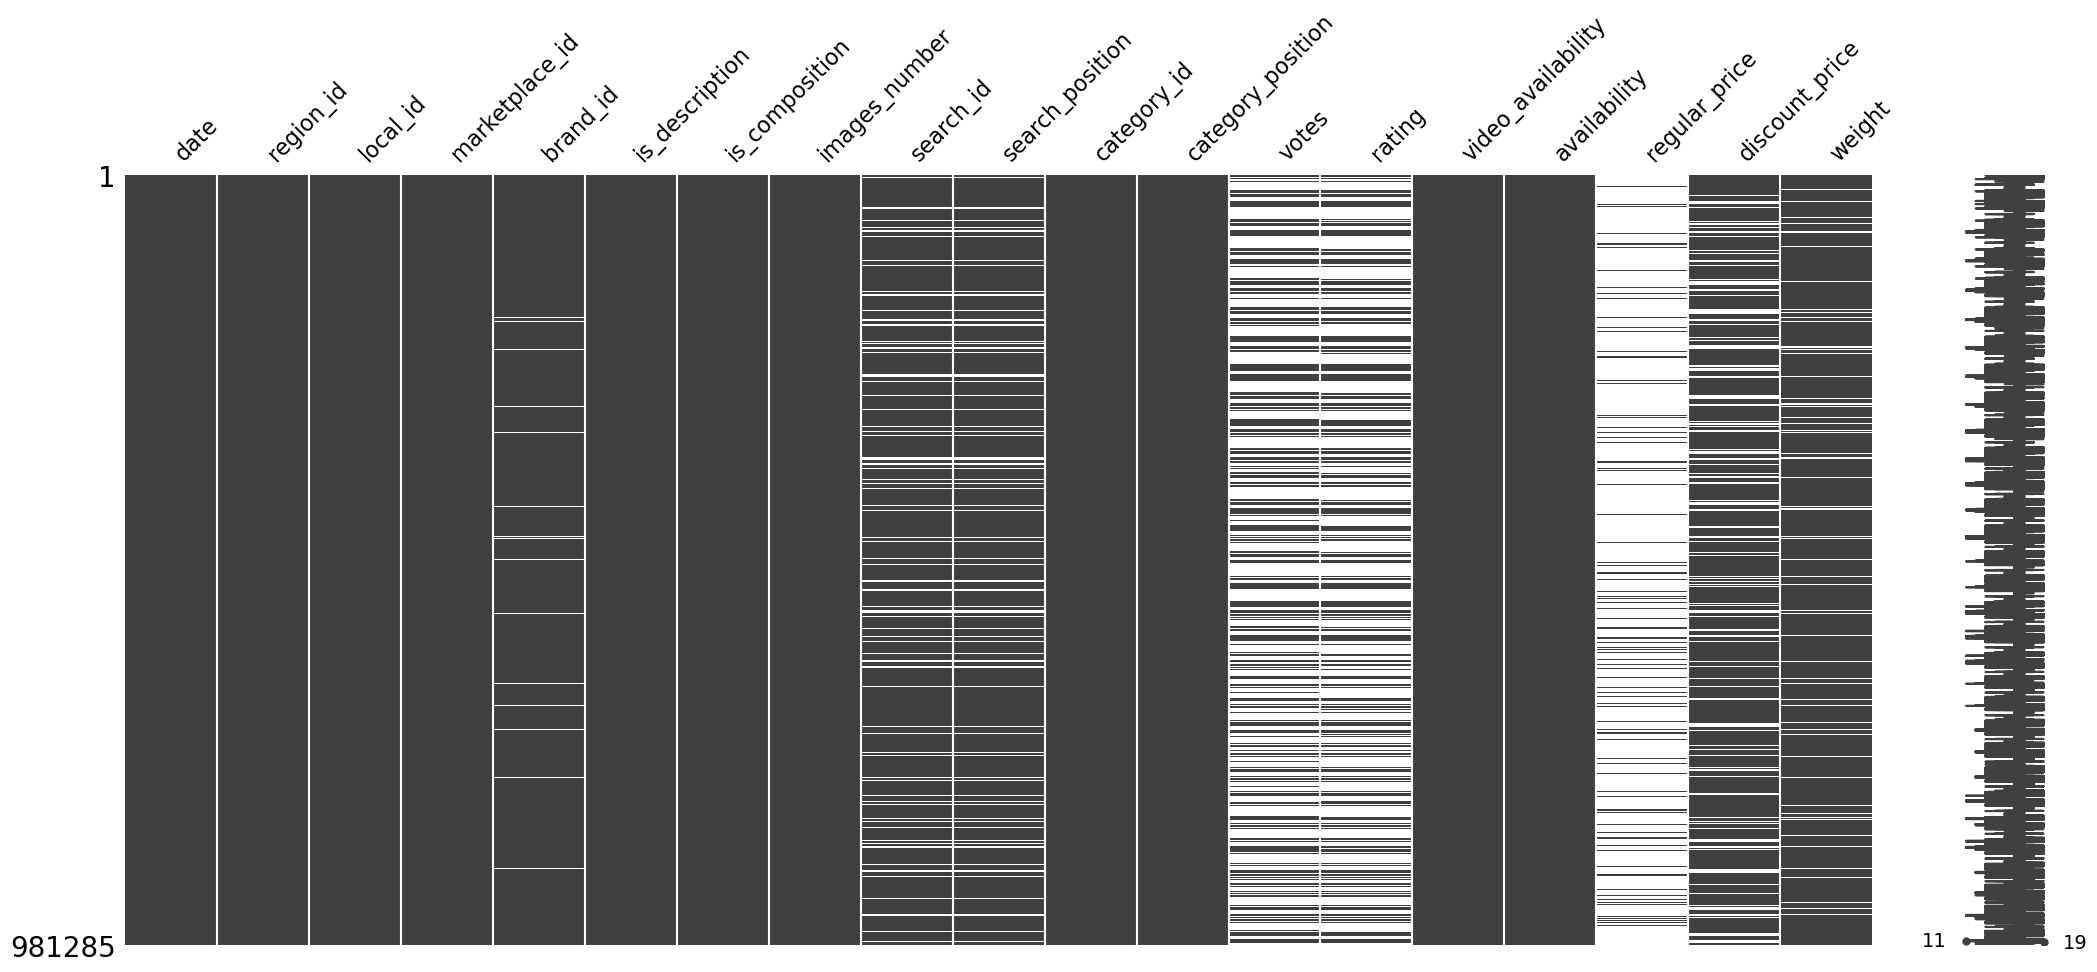

In [19]:
#Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

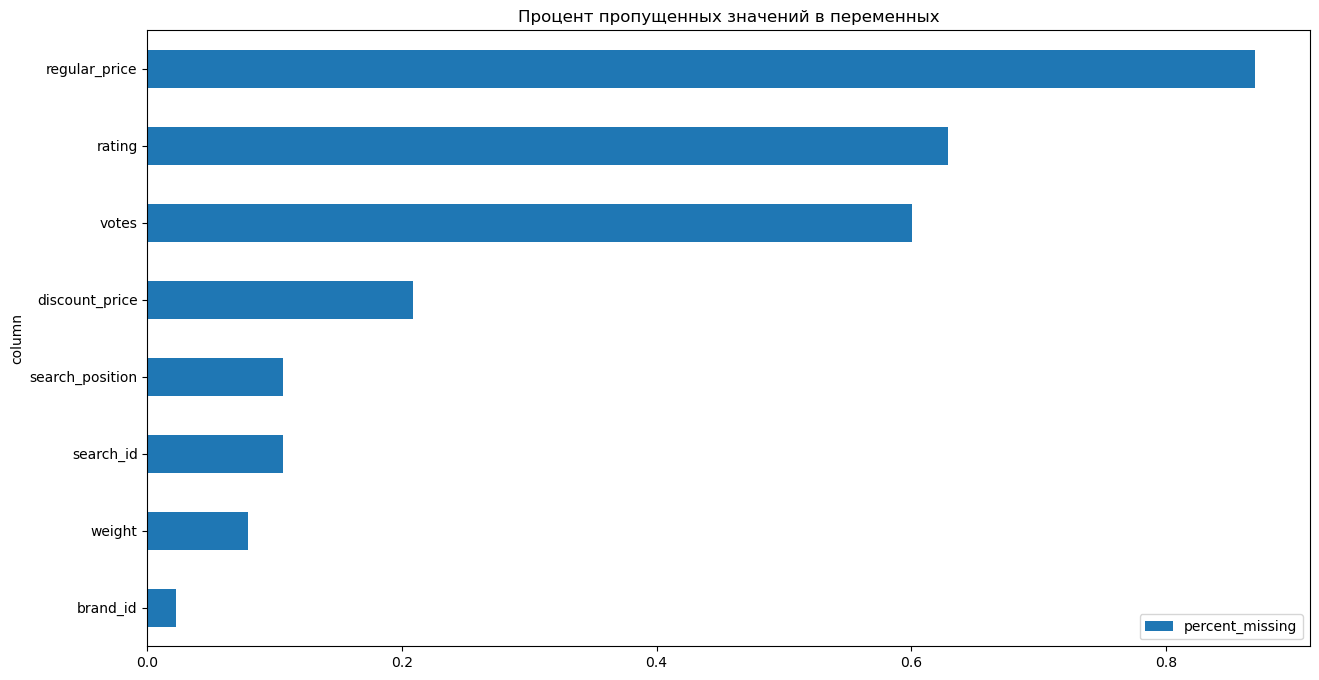

In [20]:
import pylab
def plot_missing_values(df):
    """ For each column with missing values plot proportion that is missing."""
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (15, 8)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percentage of missing values in variables');
    
plot_missing_values(df)

The variables with the greatest number of missing values are brand_id, search_id, search_position, votes, rating, regular_price, discount_price, weight

1) brand_id is a categorical variable, it shows the brand.

In [21]:
# Trying to reconstruct it by filling in values, using local_id
df['brand_id2'] = df.groupby('local_id')['brand_id'].ffill()
df['brand_id2'].count() == df['brand_id'].count()

True

Unfortunately, the method has not helped, which is due to the absence of brand_id among the same local_id. There is no way to reconstruct brand_id from other variables. So we have to delete the missing values

In [22]:
del df['brand_id2']

In [23]:
df.dropna(subset=['brand_id'], inplace = True)
str(round((1 - df.shape[0]/981285) * 100, 2))+'%'
# The final deletion of rows is less than 5%

'2.28%'

2) search_id is a categorical variable and means search query.

In [24]:
# Filling in missing values in search_id variable using brand_id column
df['search_id1'] = df.groupby('brand_id')['search_id'].ffill()
# And using local_id (for comparison)
df['search_id2'] = df.groupby('local_id')['search_id'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958934 entries, 0 to 1330663
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                958934 non-null  object 
 1   region_id           958934 non-null  int64  
 2   local_id            958934 non-null  int64  
 3   marketplace_id      958934 non-null  int64  
 4   brand_id            958934 non-null  float64
 5   is_description      958934 non-null  int64  
 6   is_composition      958934 non-null  int64  
 7   images_number       958934 non-null  int64  
 8   search_id           856467 non-null  float64
 9   search_position     856467 non-null  float64
 10  category_id         958934 non-null  int64  
 11  category_position   958934 non-null  int64  
 12  votes               391557 non-null  float64
 13  rating              364092 non-null  float64
 14  video_availability  958934 non-null  int64  
 15  availability        958934 non-nu

In [25]:
# As we can see, in search_id1 variable there are more values being filled in than in search_id2 variable,
# So let's fill search_id variable using 'brand_id'
del df['search_id2']
del df['search_id1']
df['search_id'] = df.groupby('brand_id')['search_id'].ffill()

3) search_position - position in the search query and is similar to an ordinal variable, so we will use the median

In [26]:
df['search_position'].fillna(df.groupby('brand_id')['search_position'].transform('median'), inplace = True)

4) votes - number of reviews, the variable is interval, but we saw that its distribution has many outliers, so we use median

In [27]:
df['votes'].fillna(df.groupby('brand_id')['votes'].transform('median'), inplace = True)

5) rating - also an interval variable, and has a lot of outliers, so we use median

In [28]:
df['rating'].fillna(df.groupby('brand_id')['rating'].transform('median'), inplace = True)

6) regular_price and discount_price. As it was stated before, when there is no discount, the price value is written in the discount_price column and the regular_price column remains null, so we need to move the values from the discount column to the regular price column.

<AxesSubplot:>

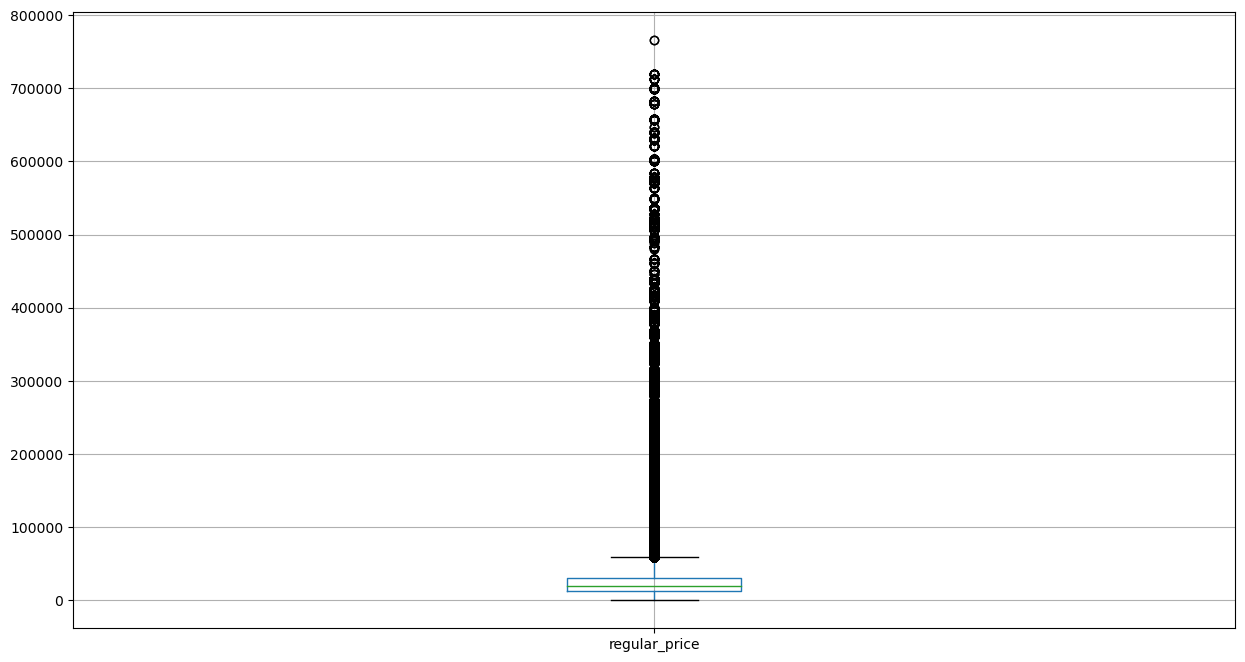

In [29]:
# Filtering the rows where regular_price = NaN, a discount_price != NaN
df[(df.regular_price.isnull()) & (df.discount_price.notnull())]]
# Filling the discount_price values into the regular_price column
df.loc[(df.regular_price.isnull()) & (df.discount_price.notnull()), 'regular_price'] = df.discount_price
df.boxplot('regular_price')

In [30]:
# Now reconstructing NaN values in regular_price using median (median we use because there are many outliers)
df['regular_price'].fillna(df.groupby('brand_id')['regular_price'].transform('median'), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958934 entries, 0 to 1330663
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                958934 non-null  object 
 1   region_id           958934 non-null  int64  
 2   local_id            958934 non-null  int64  
 3   marketplace_id      958934 non-null  int64  
 4   brand_id            958934 non-null  float64
 5   is_description      958934 non-null  int64  
 6   is_composition      958934 non-null  int64  
 7   images_number       958934 non-null  int64  
 8   search_id           950866 non-null  float64
 9   search_position     953755 non-null  float64
 10  category_id         958934 non-null  int64  
 11  category_position   958934 non-null  int64  
 12  votes               913965 non-null  float64
 13  rating              913969 non-null  float64
 14  video_availability  958934 non-null  int64  
 15  availability        958934 non-nu

In summary, the amount of NaN was considerably reduced. In order to use statistical methods, we remove the remaining NaN

In [31]:
df.dropna(subset=['search_id', 'search_position','votes', 'rating', 'regular_price'], inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853810 entries, 0 to 1330663
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                853810 non-null  object 
 1   region_id           853810 non-null  int64  
 2   local_id            853810 non-null  int64  
 3   marketplace_id      853810 non-null  int64  
 4   brand_id            853810 non-null  float64
 5   is_description      853810 non-null  int64  
 6   is_composition      853810 non-null  int64  
 7   images_number       853810 non-null  int64  
 8   search_id           853810 non-null  float64
 9   search_position     853810 non-null  float64
 10  category_id         853810 non-null  int64  
 11  category_position   853810 non-null  int64  
 12  votes               853810 non-null  float64
 13  rating              853810 non-null  float64
 14  video_availability  853810 non-null  int64  
 15  availability        853810 non-nu

In [32]:
# A total of 13% of the information was removed due to missing values
str(round((1 - 853810/981285)*100,0)) + '%'

'13.0%'

## 4. Statistical tests

For all tests, the significance level is 0.05

Hypothesis 1: Description availability (is_description), composition availability (is_composition), number of images (images_number), video availability (video_availability) and product availability (availability) have an inversely proportional relationship with category position (category_position). In other words, the more elements there are in the product card, the higher the category position ( strives for 1).

Method: Linear regression, X - is_description, is_composition, images_number, video_availability, availability; Y - category_position.

In [33]:
# 1. Checking for multicollinearity of the independent variables as well as the relationship with the dependent variable
df[[['is_description', 'is_composition', 'images_number', 'video_availability', 'availability', 'category_position']]].corr()
# Conclusion 1: No coefficients > 0.6 => we can use these variables (X) in the same model.
# Conclusion 2: video_availability should be removed from the model because the correlation with category_position (Y) is too low.
# The other variables should be added to the model

,is_description,is_composition,images_number,video_availability,availability,category_position
is_description,1.000000,0.332194,0.321555,0.036826,0.326995,-0.327736
is_composition,0.332194,1.000000,0.180131,0.016559,0.339863,-0.286177
images_number,0.321555,0.180131,1.000000,0.083575,0.307540,-0.237938
video_availability,0.036826,0.016559,0.083575,1.000000,0.024114,-0.016665
availability,0.326995,0.339863,0.307540,0.024114,1.000000,-0.562977
category_position,-0.327736,-0.286177,-0.237938,-0.016665,-0.562977,1.000000


In [34]:
import statsmodels.formula.api as smf
# Creating a linear regression model
model = smf.ols(formula='category_position ~ is_description + is_composition + images_number + availability', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      category_position   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                 1.125e+05
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:04:46   Log-Likelihood:            -6.5465e+06
No. Observations:              853810   AIC:                         1.309e+07
Df Residuals:                  853805   BIC:                         1.309e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1211.8817      1.902    637.218      0.000    1208.154    1215.609
is_description  -181.1387      1.317   -137.510      0.000    -183.721    -178.557
is_composition  -151.3852      2.061    -73.439      0.000    -155.425    -147.345
images_number    -16.8073      0.489    -34.380      0.000     -17.766     -15.849
availability    -792.2957      1.605   -493.555      0.000    -795.442    -789.149
==============================================================================
Omnibus:                  1024661.719   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        202702010.922
Skew:                           6.306   Prob(JB):                         0.00
Kurtosis:                      77.423   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 2. The normality of the residuals distribution
# Omnibus describes the normality of the distribution of our residuals (residuals of unexplained variance)
# Since 0 means complete normality, and our model has 1024661, we can conclude,
# that the residuals are not normally distributed, which reduces the quality of the model

# 3. Homoscedasticity
# Durbin-Watson is a measure of homoscedasticity, or the equal distribution of errors in our data.
# Since the ideal homoscedasticity score is between 1 and 2, in this test the score 
# is far from ideal - 0.206, again indicating that the model is of poor quality.

# 4. The quality of the model
# R-squared is 35% => the considered variables explain the dependent variable 'category_position' by 35%
# Prob. (F-statistic) = 0.000, indicating that the coefficient is significant.

# 5. Interpretation of model coefficients
# P-value of all variables = 0.000, this is less than 0.05, indicating that they are significant (we reject the hypothesis that the coefficients = 0)

# In summary, hypothesis 1 is confirmed:
# When the value of the independent variables increases by 1, the value of the dependent variable decreases.
# This means that when the number of card elements (description, composition, pictures, accessibility) increases,
# the position of the card in the category goes up! The most significant factor is availability.
# However, it should be noted that the quality of the model is quite low.

<AxesSubplot:>

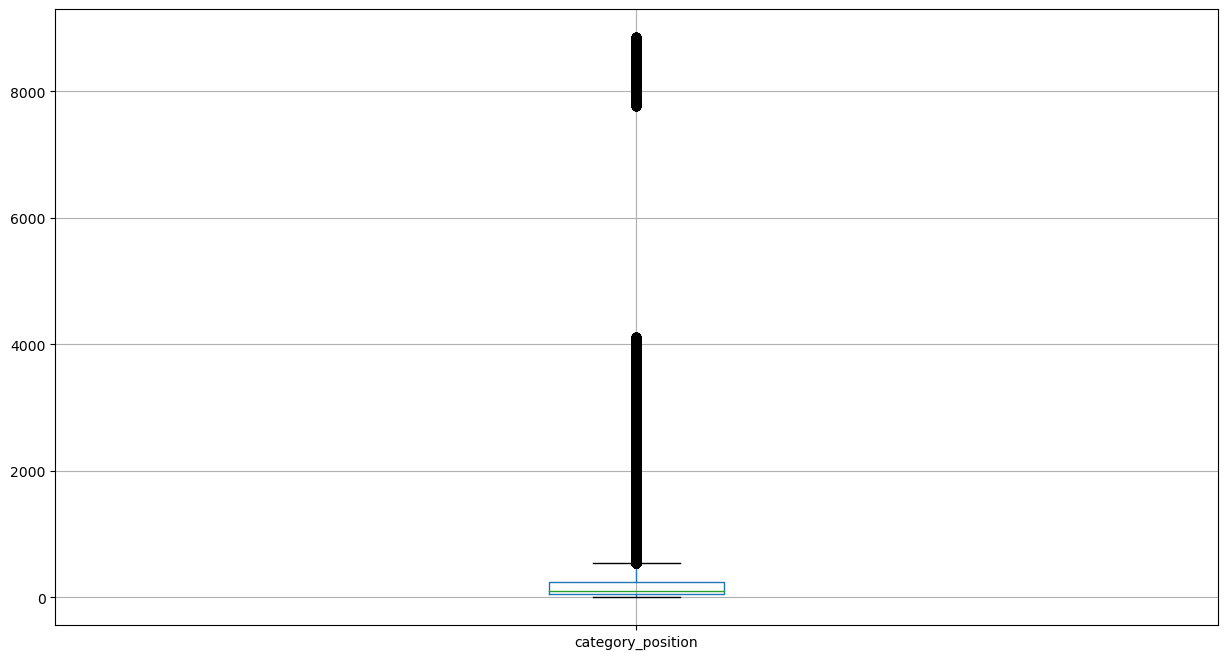

In [36]:
# We can try to improve the quality of the model, removing the outliers
df.boxplot('category_position')

In [37]:
q1 = df['category_position'].quantile(0.25)
q3 = df['category_position'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Creating a dataset with no outliers
withoutoutliers = df[(df['category_position'] > lower_bound) & (df['category_position'] < upper_bound)]
withoutoutliers.shape

(754351, 19)

In [38]:
# Creating a linear regression model on a dataset with no outliers
model = smf.ols(formula='category_position ~ is_description + is_composition + images_number + availability', data=withoutoutoutliers).fit()
model.summary()
# R-squared decreased, while other metrics remained virtually unchanged, meaning that outliers did not play such an
# important role in the worsening of the previous model's performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      category_position   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                 5.078e+04
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:04:48   Log-Likelihood:            -4.5460e+06
No. Observations:              754351   AIC:                         9.092e+06
Df Residuals:                  754346   BIC:                         9.092e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        306.8896      0.524    585.241      0.000     305.862     307.917
is_description   -23.9538      0.270    -88.610      0.000     -24.484     -23.424
is_composition   -23.6769      0.494    -47.976      0.000     -24.644     -22.710
images_number      1.1396      0.097     11.790      0.000       0.950       1.329
availability    -162.1098      0.413   -392.475      0.000    -162.919    -161.300
==============================================================================
Omnibus:                   146272.702   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           277635.990
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       4.752   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hypothesis 2: Rating and the number of reviews (votes) have a positive correlation, because good rated products are bought more often => customers write more reviews. 
In other words, the higher the number of reviews, the better the rating.

Method: Spearman correlation X1 - rating, X2 - votes.

In [39]:
# We use Spearman rank correlation due to the presence of a large number of outliers in the variables
from scipy.stats.stats import spearmanr
spearmanr(df['rating'], df['votes'])
# Hypothesis 2 is confirmed, indeed, the higher the number of reviews, the better the rating, the correlation is positive,
# correlation strength is moderate (0.67). p-value < 0.05 = > the coefficient is significant.

SpearmanrResult(correlation=0.6706983517330254, pvalue=0.0)

Hypothesis 3: The more diverse a product's search queries are (more unique search_id), the more likely the product is to be higher in search (search_position) on average

In [40]:
# Grouping the dataset and creating a column with the number of unique searches for the product:
df_search = df.groupby('local_id')['search_id'].nunique()
df_search = df_search.reset_index()
# Keeping the column of the number of unique queries
df_search = df_search.iloc[:,1]
# Grouping the dataset and creating a column with the median search position of the product:
df_position = df.groupby('local_id')['search_position'].median()
df_position = df_position.reset_index()
# Keeping the column again
df_position = df_position.iloc[::,1]

# Doing a correlation test
spearmanr(df_search, df_position)

# Hypothesis 3 is not confirmed due to the p-value of the correlation coefficient. 
# p-value = 1.09, which is greater than 0.05 => the coefficient is not significant, we accept H0 hypothesis of no relationship.
# There is no relationship between the number of unique search queries for a product and its position in search. 

SpearmanrResult(correlation=-0.33040518731252244, pvalue=1.087447819232258e-258)

Hypothesis 4: The average price (regular_price) across  “cards have a description” and “cards have no description” (is_description) groups is different. 

In [41]:
# Creatig two groups
with_disc = df[df['is_description']== 1]['regular_price']
without_disc = df[df['is_description']==0]['regular_price']

In [42]:
# Median price of the groups with and without descriptions
with_disc.median(), without_disc.median()

(17500.0, 19600.0)

(553977,) (299833,)


(<AxesSubplot:>, <AxesSubplot:>)

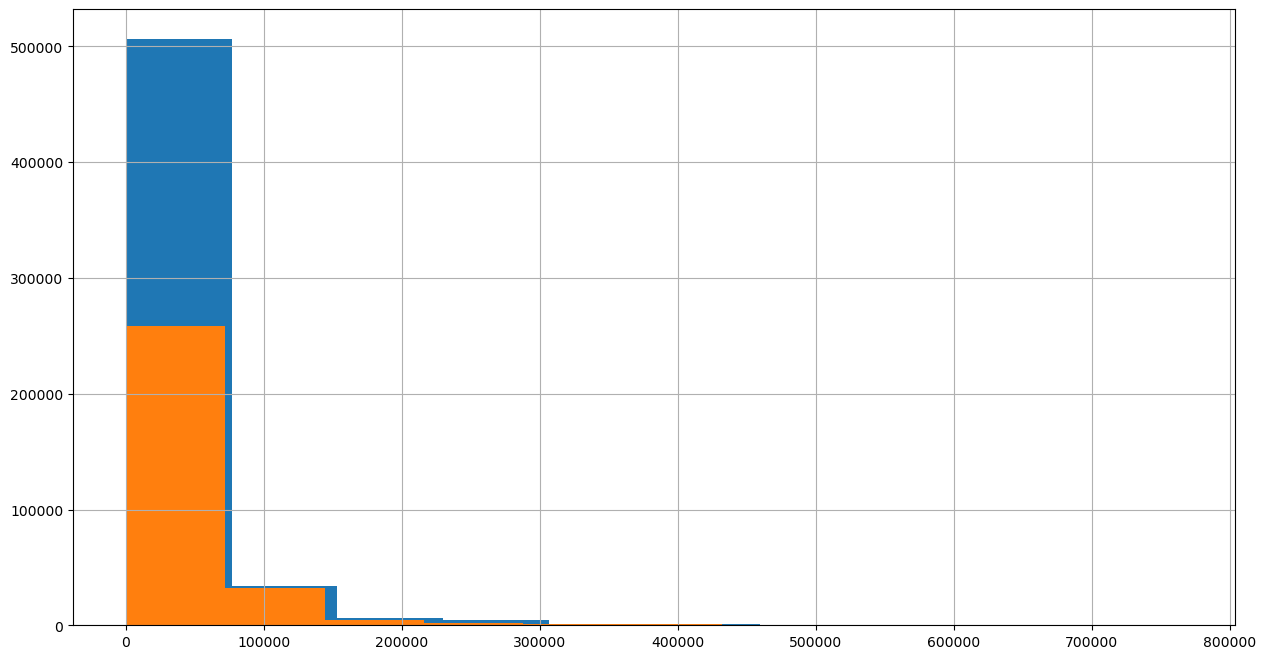

In [43]:
# Sample size > 30 
print(with_disc.shape, without_disc.shape)
# However, the distribution is not normal, as indicated by the large number of values near 0 and stretching
# to the right side of the graph. Therefore, we will use the non-parametric Mann-Whitney test. 
with_disc.hist(), without_disc.hist()

In [44]:
from scipy.stats import mannwhitneyu
# Performing a non-parametric Mann-Whitney test for two independent samples
mannwhitneyu(with_disc, without_disc, alternative = 'two-sided')

# p-value < 0.05 => Rejecting the null hypothesis that there are no statistical differences 
# in average price ranks. Hypothesis 4 is confirmed, the average price is higher for cards,
# that do not have a description.

MannwhitneyuResult(statistic=76901010046.0, pvalue=0.0)

## 5. Results

Thus, the following insights can be distinguished:

1. In the marketplace of 32 categories 55 anomalies were identified: low search positions of product cards, as well as “empty” product cards (without description, price and product availability) with a large number of reviews.
2. When the number of card elements (description, composition, pictures, availability on the marketplace) increases, the position of the card in the category goes up. The most significant component is availability.
3. The number of reviews and rating have a positive relationship.
4. The average price of product cards without a description is higher than those with a description. It would make more sense to look at what these products without descriptions are and why they have higher prices on average.